# Title of project 
 Wine quality prediction

# objective
 the obejctive of this model is to predict the wine quality using support vector machine

# data source 
from ybi foundation 'https://github.com/YBIFoundation/Dataset/raw/main/WhiteWineQuality.csv'

### Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import data

In [5]:
 df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/WhiteWineQuality.csv',sep = ';')

# Describe Data

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [12]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [13]:
df.shape

(4898, 12)

In [15]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.600000,0.333250,0.336000,6.392500,0.054300,53.325000,170.600000,0.994884,3.187500,0.474500,10.345000
4,7.129448,0.381227,0.304233,4.628221,0.050098,23.358896,125.279141,0.994277,3.182883,0.476135,10.152454
5,6.933974,0.302011,0.337653,7.334969,0.051546,36.432052,150.904598,0.995263,3.168833,0.482203,9.808840
6,6.837671,0.260564,0.338025,6.441606,0.045217,35.650591,137.047316,0.993961,3.188599,0.491106,10.575372
7,6.734716,0.262767,0.325625,5.186477,0.038191,34.125568,125.114773,0.992452,3.213898,0.503102,11.367936
8,6.657143,0.277400,0.326514,5.671429,0.038314,36.720000,126.165714,0.992236,3.218686,0.486229,11.636000
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


# Define y(dependent or target value ) and X(independent or features)

In [16]:
y = df['quality']

In [17]:
y.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

In [18]:
y.shape

(4898,)

In [21]:
x = df.drop('quality',axis = 1)

In [22]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [23]:
x.shape

(4898, 11)

# get x value standardizd 
standardized of dataset is a common for many machine learnig estimator implemented 
in scikit-learn; they might have badly if the individual feature do not more or less 
look like standard normally distributed data; Gaussian with zero mean and 
unit varaince 
Next approch is go for MinMax Scaler


In [28]:
from  sklearn.preprocessing import StandardScaler

In [29]:
ss= StandardScaler()

In [30]:
x = ss.fit_transform(x)

In [31]:
x


array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
        -1.24692128e+00, -3.49184257e-01, -1.39315246e+00],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
         7.40028640e-01,  1.34184656e-03, -8.24275678e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
         4.75101984e-01, -4.36815783e-01, -3.36667007e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -1.31315295e+00, -2.61552731e-01, -9.05543789e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
         1.00495530e+00, -9.62604939e-01,  1.85757201e+00],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
         4.75101984e-01, -1.48839409e+00,  1.04489089e+00]])

In [33]:
x.shape

(4898, 11)

# train test split

In [34]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2, random_state= 2529)

In [38]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3918, 11), (980, 11), (3918,), (980,))

# get model train

In [44]:
from sklearn.svm import SVC

In [45]:
 svc = SVC()

In [46]:
svc.fit(x_train,y_train)

SVC()

# Get Model Prediction 

In [48]:
y_pred = svc.predict(x_test)

In [49]:
y_pred.shape

(980,)

In [53]:
y_pred[:10]

array([6, 5, 6, 5, 5, 6, 7, 6, 6, 5], dtype=int64)

# Get Model Evaluation

In [55]:
from sklearn.metrics import confusion_matrix, classification_report

In [59]:
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)

[[  0   0   2   1   0   0]
 [  0   2  23   9   0   0]
 [  0   0 157 121   1   0]
 [  0   0  87 355  21   0]
 [  0   0   6 117  46   0]
 [  0   0   1  23   8   0]]


In [60]:
import seaborn as sns

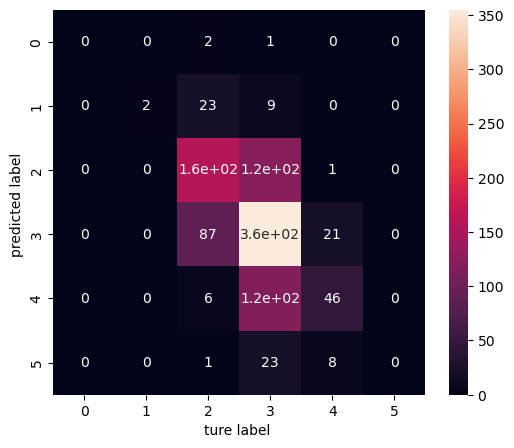

In [73]:
fig, ax = plt.subplots(figsize=(6,5))
ax = sns.heatmap(conf_matrix,annot=True)
plt.xlabel("ture label ")
plt.ylabel("predicted label ");


In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       1.00      0.06      0.11        34
           5       0.57      0.56      0.57       279
           6       0.57      0.77      0.65       463
           7       0.61      0.27      0.38       169
           8       0.00      0.00      0.00        32

    accuracy                           0.57       980
   macro avg       0.46      0.28      0.28       980
weighted avg       0.57      0.57      0.54       980



C:\Users\amirb\OneDrive\Desktop\machine_learning\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  Calculate metrics for each instance, and find their average (only
C:\Users\amirb\OneDrive\Desktop\machine_learning\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  Calculate metrics for each instance, and find their average (only
C:\Users\amirb\OneDrive\Desktop\machine_learning\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


# explanation 

 this model is basically a classification model of support vector machine and we train 
our model using data set which is divide into training and testing then using training data set 
we train our model and and then we make our prediction using testing data set and evaluate
our model by diffrent evalution and it is ready for prediction 